<a href="https://colab.research.google.com/github/leandroboteon/regressao-invest-mkt/blob/main/Regressao_para_MKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# lendo o df
df = pd.read_csv("/content/drive/MyDrive/Formação em Dados/Desafio 04/MKT.csv", sep=",")

In [73]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [74]:
# verificando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [75]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Text(0.5, 1.0, 'Boxplot do Investimento no YouTube')

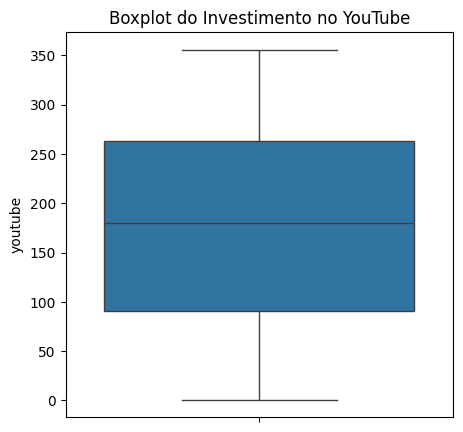

In [76]:
# Box plot
plt.figure(figsize=(5, 5))

# youtube
sns.boxplot(y='youtube', data=df)
plt.title('Boxplot do Investimento no YouTube')


Text(0.5, 1.0, 'Boxplot do Investimento no Facebook')

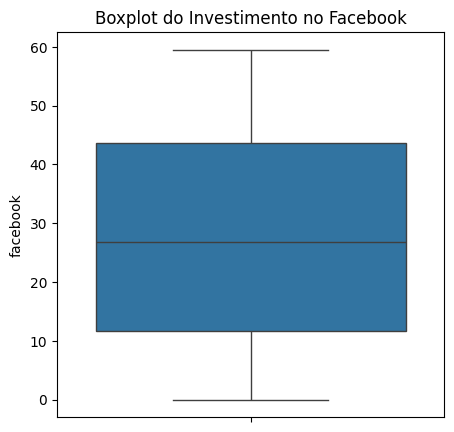

In [77]:
plt.figure(figsize=(5, 5))
# facebook
sns.boxplot(y='facebook', data=df)
plt.title('Boxplot do Investimento no Facebook')



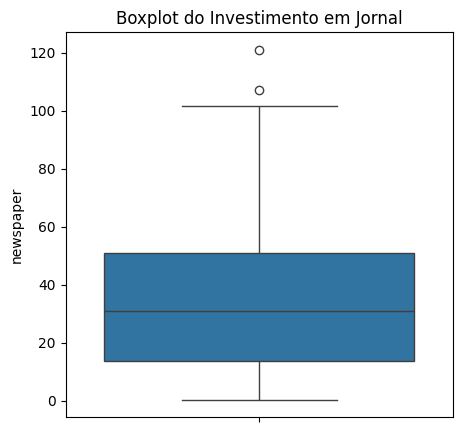

In [78]:
plt.figure(figsize=(5, 5))
# newspaper
sns.boxplot(y='newspaper', data=df)
plt.title('Boxplot do Investimento em Jornal')

plt.show()

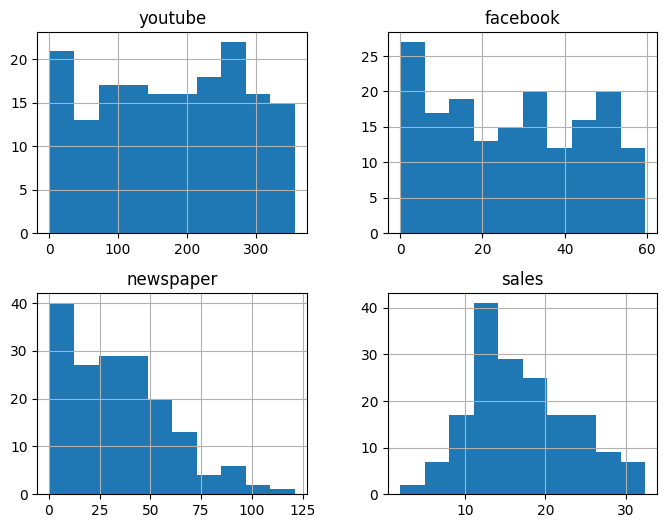

In [79]:
# histograma
df.hist(figsize=(8, 6))
plt.show()

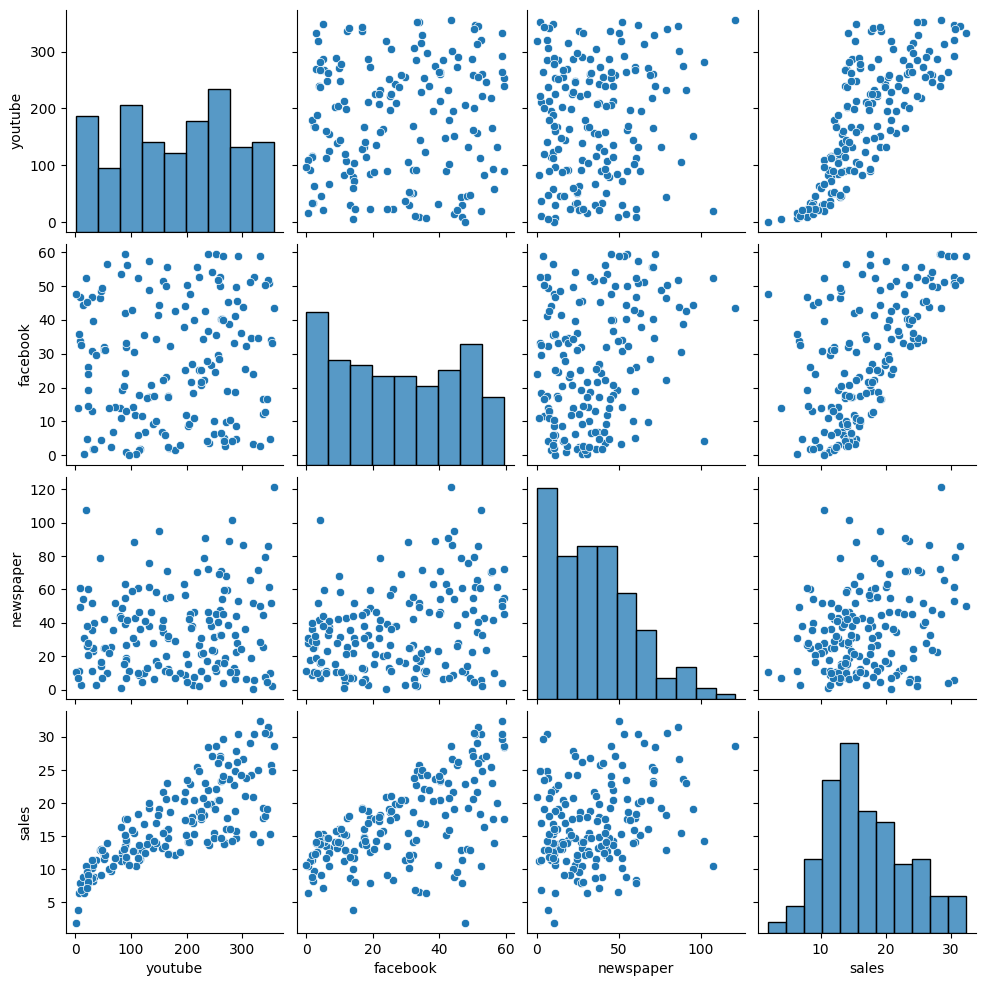

In [80]:
# relacoes entre as variáveis
sns.pairplot(df)
plt.show()


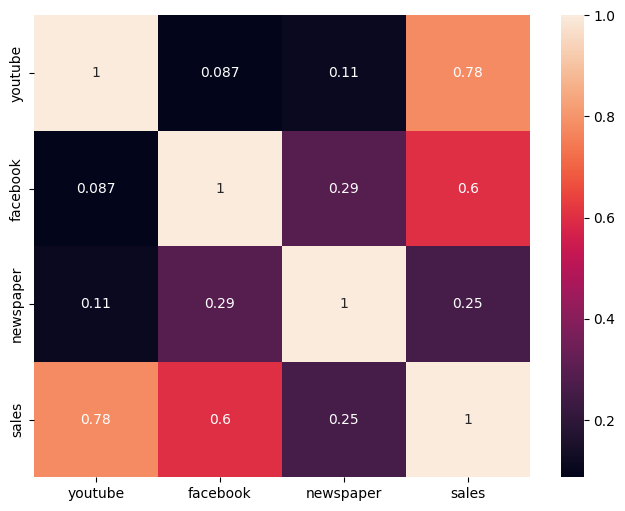

In [81]:
# heatmap da correlacao
correlacao = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True)
plt.show()

In [82]:
# conclusao
# não há valores nulos, todos tipo float, correlação entre youtube e sales